In [52]:
import sys
sys.path.append("../")
from enhancer import *
from enhancer.inference import *
from enhancer.utils import *
from enhancer.options import *
import copy
# device = torch.device("cpu")
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [45]:
opt_path = "../configs/smallmodel/mse_train.yml"
generator= get_generator_from_yml(opt_path,False)


generator is loaded from /notebooks/pixelEnhancer/checkpoints/small_checkpoint_mse_x2.pt


In [46]:
def preds(arr,filename=None,denormalize=False):
    arr.clamp_(0,1)
    a = im_convert(arr[0],denormalize=denormalize)
    im = Image.fromarray(np.uint8(a*255))
    if filename:
        plt.imsave(filename+'.png', a)
    return im


In [47]:
def predict_without_patch(filename,scale=4,resize=True):
    bicubic = None
    if type(filename) == type(""):
        ex = Image.open(filename).convert("RGB")
    else:
        ex = filename.copy()
        filename = "sample.png"
        ex_img = ex.copy()
    if resize:
        ex= ex.resize((ex.size[0]//scale,ex.size[1]//scale))
        bicubic = ex.resize((ex.size[0]*scale,ex.size[1]*scale),resample = Image.BICUBIC)
        ex_img = ex.copy()
    ex = np.array(ex).transpose(2,0,1)/255.
    ex = torch.from_numpy(ex).unsqueeze(0).float().to(device)
    with torch.no_grad():
        generator.eval()
        result = generator(ex)
    img = preds(result,filename)
    if resize ==False:
        bicubic = ex_img.resize((ex_img.size[0]//scale,ex_img.size[1]//scale))
    return img,ex_img,bicubic



In [48]:
def predict_with_patch(img,generator=generator):
    try:
        img_splitter = ImageSplitter(seg_size=212, scale_factor=2, boarder_pad_size=1)
        img_patches = img_splitter.split_img_tensor(img, scale_method=None, img_pad=0)
        out=[]
        with torch.no_grad():
          generator.eval()
          for j,i in enumerate(tqdm(img_patches)):
            # print(j)
            with torch.no_grad():
                out.append(generator(i.to(device)))
        img_upscale = img_splitter.merge_img_tensor(out)
        a=preds(img_upscale)
        return a
    except Exception as e:
        print(str(e))

In [49]:
import requests
from io import  BytesIO
response = requests.get("https://images.unsplash.com/photo-1594230612513-24c4ca53e781?ixlib=rb-1.2.1&auto=format&fit=crop&w=1050&q=80")
img = Image.open(BytesIO(response.content))

In [65]:
from PIL import Image
import requests
from io import BytesIO
files =["https://images.unsplash.com/photo-1594230612513-24c4ca53e781?ixlib=rb-1.2.1&auto=format&fit=crop&w=1050&q=80",
        "https://images.unsplash.com/photo-1594333086391-a10c587762e8?ixlib=rb-1.2.1&auto=format&fit=crop&w=623&q=80",
        "https://images.unsplash.com/photo-1594312244418-5c6a26d3d899?ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80",
        "https://images.unsplash.com/photo-1593703869101-b56c87d6711c?ixlib=rb-1.2.1&auto=format&fit=crop&w=564&q=80",
        "https://images.unsplash.com/photo-1594399981502-94a5079e2142?ixlib=rb-1.2.1&auto=format&fit=crop&w=645&q=80",
"https://images.unsplash.com/photo-1594296281709-7a73c2076ca8?ixlib=rb-1.2.1&auto=format&fit=crop&w=634&q=80",
"https://images.unsplash.com/photo-1593625240190-ce1c459f0d82?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594303373078-0abd6dbd283f?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594321120041-00d204971461?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594151356294-406cbc129494?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593980280424-102c6245deae?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594105893870-285201b9f5ae?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594134258307-1814e25387ce?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594201658541-52380e1ca6df?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594176778260-461a4a3ae9cb?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594008231016-ca4f3d382b21?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593703869101-b56c87d6711c?ixlib=rb-1.2.1&auto=format&fit=crop&w=564&q=80",
"https://images.unsplash.com/photo-1593987011155-542d44e8660e?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594140700520-8afea3283e2c?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594127141105-37bdc7ef4d3e?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593853761096-d0423b545cf9?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1594112616811-174fbd2a6615?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593987646219-3d95fc90539d?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593930956511-139219dd9a90?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593845408129-dadab978afe9?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593853963555-013dbf33c060?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593884934858-7989100a0658?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593673711888-c1228d4f8a46?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593489463804-6bf54c98ac19?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1591094509198-eca253fc69de?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593745564925-21d727c7cbb0?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60",
"https://images.unsplash.com/photo-1593777002932-6bb4beba64a4?ixlib=rb-1.2.1&auto=format&fit=crop&w=600&q=60"
        ]
imgs_array =[]
for d,i in enumerate(files):
  response = requests.get(i)
  img = Image.open(BytesIO(response.content))
  # img.save("/content/drive/My Drive/images/"+str(d)+".jpg")
  imgs_array.append(img)

In [52]:
!ls

0-bicubic.png		       face.png		results
Photo-1.jpeg		       face.png.png	sample.png.png
WIN_20201204_19_46_21_Pro.jpg  index.jpeg	test.png
WIN_20201204_19_46_22_Pro.jpg  inference.html	test1.png
WIN_20201204_19_46_24_Pro.jpg  inference.ipynb	train_smallmodel_mse.html
bicubic.png		       result.png	train_smallmodel_mse.ipynb
core			       result0.png


In [57]:
img =  Image.open("WIN_20201204_19_46_22_Pro.jpg").convert("RGB")
generator.to(device)
#generator.load_state_dict(torch.load("../checkpoints/small_checkpoint_mse_x2.pt",map_location=device)["generator_state_dict"])
import time
start=time.time()
a,b,c = predict_without_patch(img,resize=True,scale=2)
print(time.time()-start)

0.3943040370941162


In [ ]:

# a=predict_with_patch(img)
# a.save(filename)

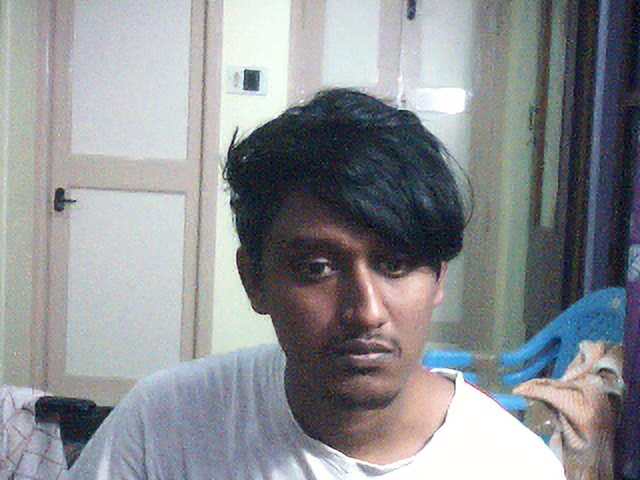

In [58]:
a

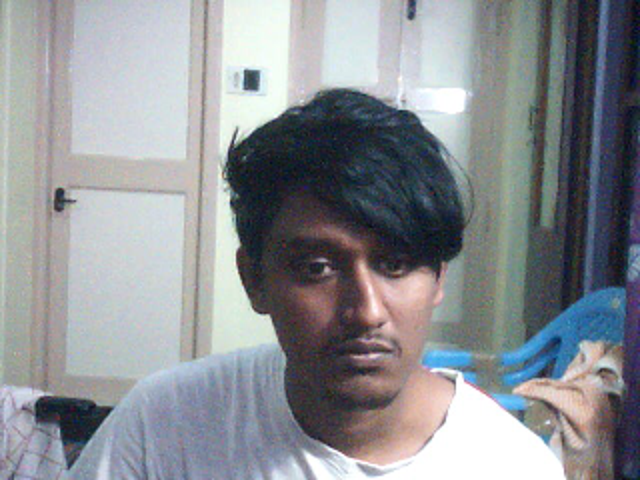

In [59]:
c